In [22]:
setwd('/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts')
suppressPackageStartupMessages(source("tree_helper_function.R"))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(dplyr))
load("environment/brain_sim_nodtu/mode=gc_bias/mapDf.RData")
dir <- "environment/brain_sim_nodtu_lowfc/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/comp_trees"
load(file.path(dir, "treeCons.RData"))
load(file.path(dir, "treeCons0.RData"))
load(file.path(dir, "treeCor.RData"))
load(file.path(dir, "treeMeanInf0.RData"))
load(file.path(dir, "treeThr.RData"))
load(file.path(dir, "yAggConsNS.RData"))
load(file.path(dir, "yAggConsNS0.RData"))
load(file.path(dir, "yAggCorNS.RData"))
load(file.path(dir, "yAggMeanInfNS0.RData"))
load(file.path(dir, "yAggThrNS.RData"))

### Plotting mean Infrv

In [23]:
### Consensus
depth <- node.depth(treeCons,2)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- data.frame(infRV = mcols(yAggConsNS)[["meanInfRV"]], depth = depth, modDep = modDep, type="Consensus")

In [24]:
### Consensus0
depth <- node.depth(treeCons0,2)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- rbind(dfInfRV, data.frame(infRV = mcols(yAggConsNS0)[["meanInfRV"]], depth = depth, modDep = modDep, type="Consensus0"))

In [25]:
### Correlation
depth <- node.depth(treeCor,2)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- rbind(dfInfRV, data.frame(infRV = mcols(yAggCorNS)[["meanInfRV"]], depth = depth, modDep = modDep, type="Anti-Correlation"))

In [26]:
### Mean Inf 0 threshold
depth <- node.depth(treeMeanInf0,2)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- rbind(dfInfRV, data.frame(infRV = mcols(yAggMeanInfNS0)[["meanInfRV"]], depth = depth, modDep = modDep, type="MeanInf0"))

In [27]:
### Threshold
depth <- node.depth(treeThr,2)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- rbind(dfInfRV, data.frame(infRV = mcols(yAggThrNS)[["meanInfRV"]], depth = depth, modDep = modDep, type="Thr"))

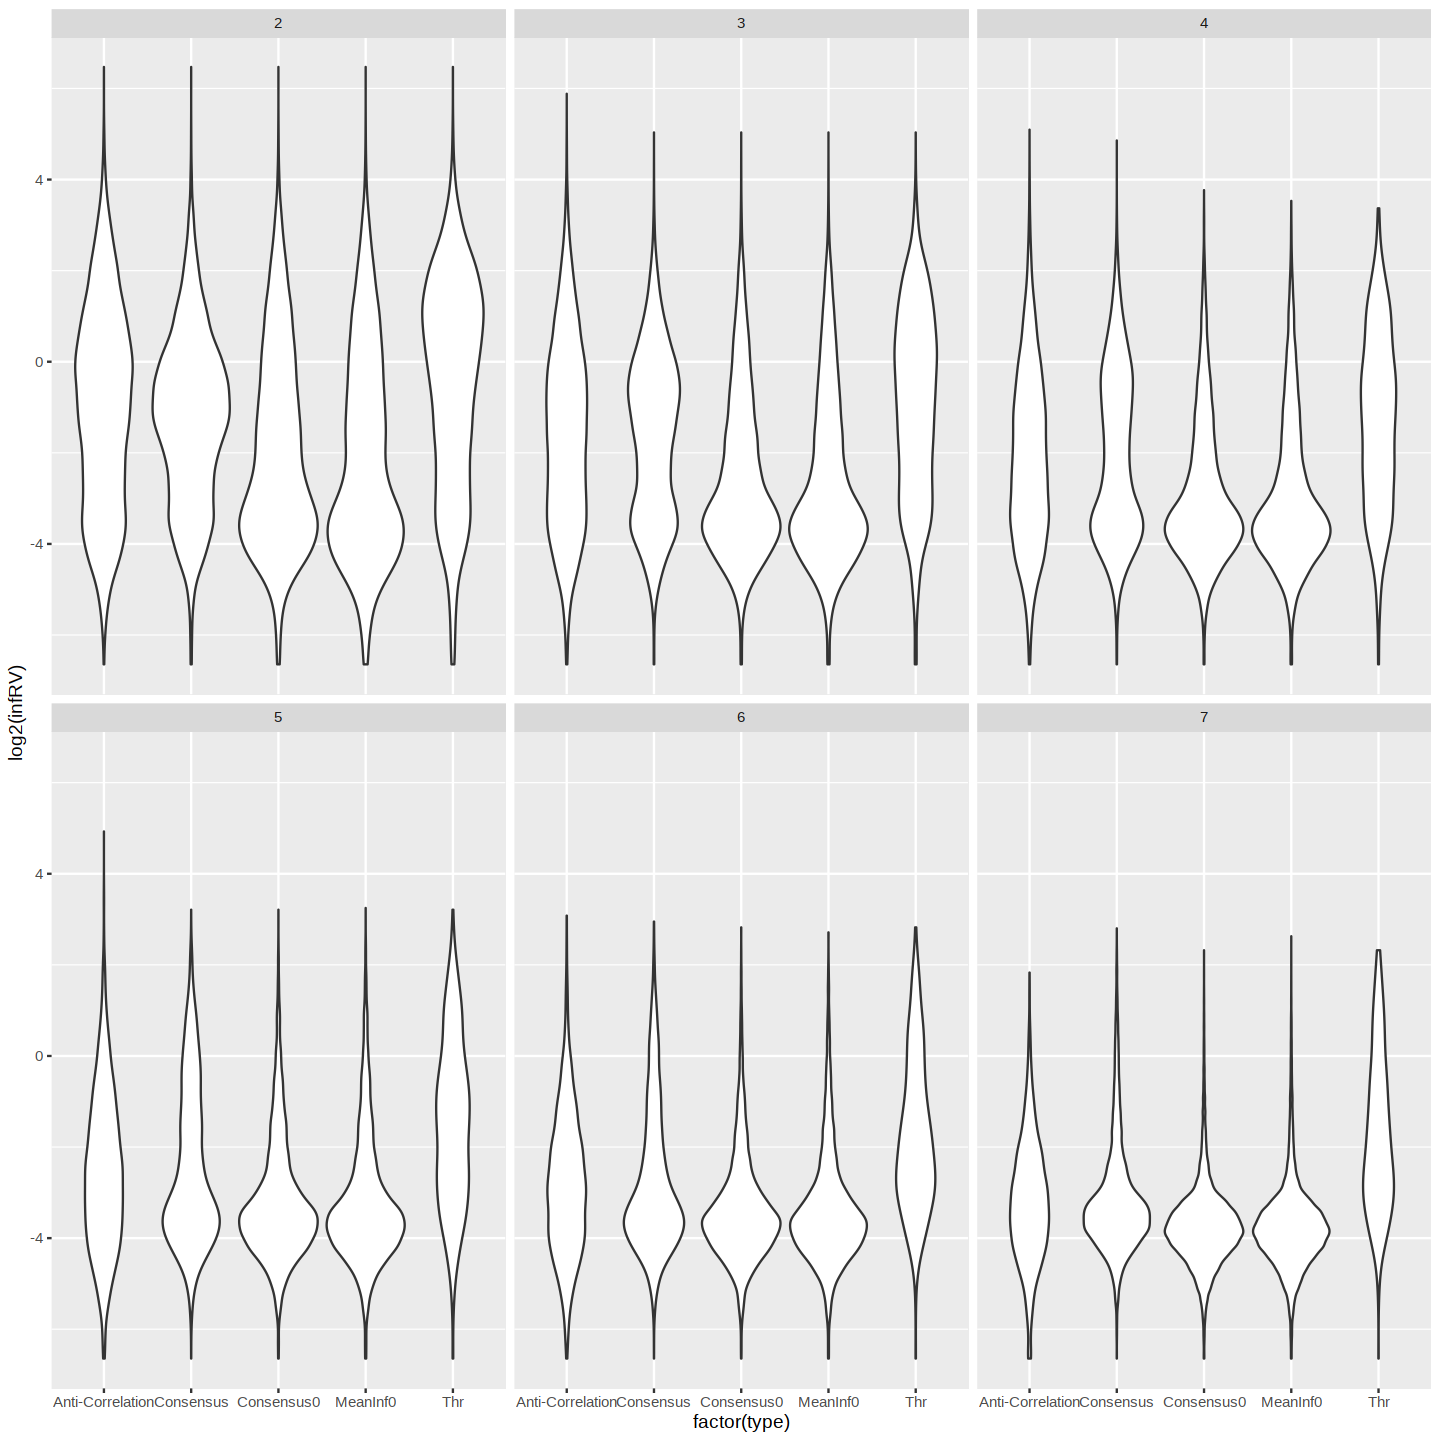

In [65]:
options(repr.plot.width=12, repr.plot.height=12)
dfInfRV %>% filter(depth!=1) %>% ggplot(aes(x=factor(type), y=log2(infRV))) + geom_violin() + facet_wrap(vars(modDep))

In [66]:
reshape::cast(dfInfRV %>% filter(depth!=1) %>% group_by(type,modDep), type~modDep,
              value="infRV", fun.aggregate = median)

,type,2,3,4,5,6,7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anti-Correlation,0.5220111,0.3254814,0.20639677,0.15626158,0.12996077,0.10190135
2,Consensus,0.4434584,0.3491495,0.19419400,0.12536943,0.10544140,0.09263368
3,Consensus0,0.1900728,0.1216865,0.09876035,0.08853265,0.08265857,0.07126710
4,MeanInf0,0.1681688,0.1111177,0.09414206,0.08593071,0.08030373,0.07012315
5,Thr,0.9020504,0.5661393,0.42462664,0.34120461,0.24741893,0.23725530


#### Reduction in infRV

In [73]:
### Consensus
innNodes <- length(treeCons$tip)+1:treeCons$Nnode
childNodes <- Descendants(treeCons, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggConsNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggConsNS)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- data.frame(red = c(rep(1000,length(treeCons$tip)), redInfRV), type="Consensus")
save(dfRedInf, file = file.path(dir, "dfRedInf.RData"))

In [74]:
### Consensus0
innNodes <- length(treeCons0$tip)+1:treeCons0$Nnode
childNodes <- Descendants(treeCons0, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggConsNS0)[innNodes[i], "meanInfRV"] - mean(mcols(yAggConsNS0)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeCons0$tip)), redInfRV), type="Consensus0"))
save(dfRedInf, file = file.path(dir, "dfRedInf.RData"))

In [28]:
### Anti-Correlation
innNodes <- length(treeCor$tip)+1:treeCor$Nnode
childNodes <- Descendants(treeCor, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggCorNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggCorNS)[childNodes[[i]], "meanInfRV"]))
dfRedInf[dfRedInf$type=="Anti-Correlation","red"]<- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeCor$tip)), redInfRV), type="Anti-Correlation"))
save(dfRedInf, file = file.path(dir, "dfRedInf.RData"))

In [ ]:
### Mean Inf 0 Thr
innNodes <- length(treeMeanInf0$tip)+1:treeMeanInf0$Nnode
childNodes <- Descendants(treeMeanInf0, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggMeanInfNS0)[innNodes[i], "meanInfRV"] - mean(mcols(yAggMeanInfNS0)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeMeanInf0$tip)), redInfRV), type="MeanInf0"))
save(dfRedInf, file = file.path(dir, "dfRedInf.RData"))

In [ ]:
### Threshold
innNodes <- length(treeThr$tip)+1:treeThr$Nnode
childNodes <- Descendants(treeThr, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggThrNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggThrNS)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeThr$tip)), redInfRV), type="Cons_Thr"))
save(dfRedInf, file = file.path(dir, "dfRedInf.RData"))

In [ ]:
dfInfRV <- cbind(dfInfRV, redInfRV = dfRedInf$red)
save(dfInfRV, file = file.path(dir, "dfInfRV.RData"))

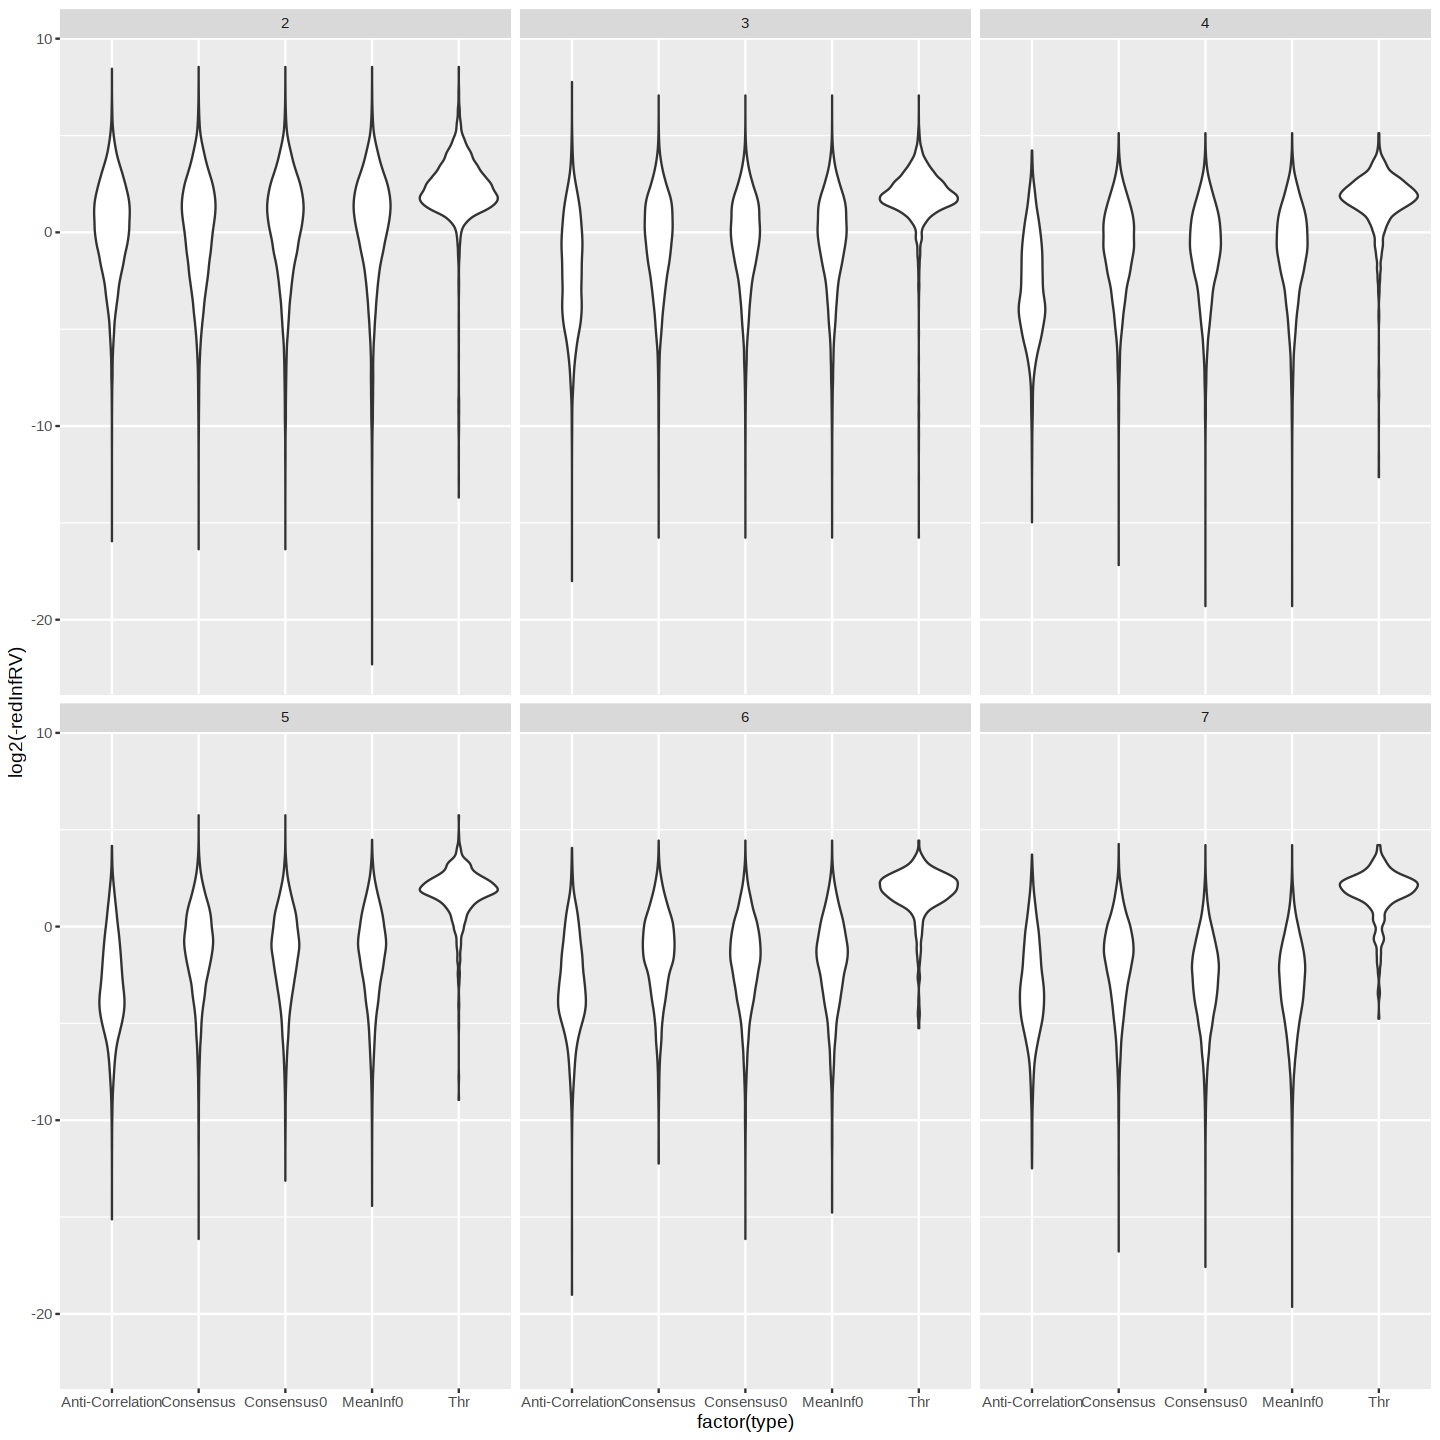

In [37]:
options(repr.plot.width=12, repr.plot.height=12)
dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% ggplot(aes(x=factor(type), y=log2(-redInfRV))) + geom_violin() + facet_wrap(vars(modDep))

In [38]:
reshape::cast(dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% group_by(type,modDep), type~modDep, length)
reshape::cast(dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% group_by(type,modDep), type~modDep, median, value="redInfRV")
reshape::cast(dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% group_by(type,modDep), type~modDep, min, value="redInfRV")

Using redInfRV as value column.  Use the value argument to cast to override this choice



,type,2,3,4,5,6,7
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,Anti-Correlation,19237,6514,3648,2413,1555,2338
2,Consensus,20298,13515,10199,7722,5744,14119
3,Consensus0,19377,13968,11454,9519,7905,37699
4,MeanInf0,18737,13833,11424,9649,8089,43533
5,Thr,9343,3816,1761,783,357,332


,type,2,3,4,5,6,7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anti-Correlation,-1.290491,-0.2723900,-0.1362396,-0.1108887,-0.1207028,-0.1082184
2,Consensus,-1.340874,-0.8482378,-0.6255909,-0.5124112,-0.4380653,-0.3336241
3,Consensus0,-1.536628,-0.8641013,-0.5732456,-0.4199889,-0.3246300,-0.1556657
4,MeanInf0,-1.622811,-0.8810614,-0.5800856,-0.4208666,-0.3261060,-0.1467237
5,Thr,-4.625432,-3.7754143,-3.6050463,-3.7565856,-3.8501109,-3.9214729


,type,2,3,4,5,6,7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anti-Correlation,-348.9086,-217.3042,-18.72272,-17.93469,-16.66992,-13.12459
2,Consensus,-372.1926,-134.1582,-34.79958,-53.61047,-21.68664,-19.18511
3,Consensus0,-372.1926,-134.1582,-34.79958,-53.61047,-21.68664,-18.42730
4,MeanInf0,-372.1926,-134.1582,-34.79958,-22.29103,-21.68664,-18.42730
5,Thr,-372.1926,-134.1582,-34.79958,-53.61047,-21.68664,-18.42730


In [43]:
load(file.path(dir, "genesCons0.RData"))
load(file.path(dir, "genesCons.RData"))
load(file.path(dir, "genesCor.RData"))
load(file.path(dir, "genesMeanInf0.RData"))
load(file.path(dir, "genesThr.RData"))

In [42]:
dir

[1] "environment/brain_sim_nodtu_lowfc/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/comp_trees"

In [44]:
dfNGenes <- data.frame(matrix(nrow=0, ncol=3))
colnames(dfNGenes) <- c("Type", "nGenes", "depth")
dfNGenes <- rbind(dfNGenes, data.frame(Type="Consensus", nGenes = sapply(genesCons[2:length(genesCons)], length), 
                                       depth = node.depth(treeCons,2)[length(treeCons$tip)+2:treeCons$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="Consensus0", nGenes = sapply(genesCons0[2:length(genesCons0)], length), 
                                       depth = node.depth(treeCons0,2)[length(treeCons0$tip)+2:treeCons0$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="Anti-Correlation", nGenes = sapply(genesCor[2:length(genesCor)], length), 
                                       depth = node.depth(treeCor,2)[length(treeCor$tip)+2:treeCor$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="MeanInf0", nGenes = sapply(genesMeanInf0[2:length(genesMeanInf0)], length), 
                                       depth = node.depth(treeMeanInf0,2)[length(treeMeanInf0$tip)+2:treeMeanInf0$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="Cons_Thr", nGenes = sapply(genesThr[2:length(genesThr)], length), 
                                       depth = node.depth(treeThr,2)[length(treeThr$tip)+2:treeThr$Nnode]))

dfNGenes[dfNGenes$depth > 6,"depth"]=7

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 719



    1     2     3     4     5     6     7     8     9    10    11    12    13 
24827 19782  4434  7661  2401  1628  1889  2059   839   692   554   576   540 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
  462   416   358   231   201   197   196   171   182   157   131   126    99 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
  106    78    91    73    73    56    56    73    57    43    63    51    43 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
   54    55    46    48    42    37    37    29    29    21    24    30    37 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
   26    20    25    20    25    17    22    16    23    24    14    13    20 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
   20    17    15     6    14    15    18    13    19    14    10     6    10 
   79    80    81    82    83    84    85    86    

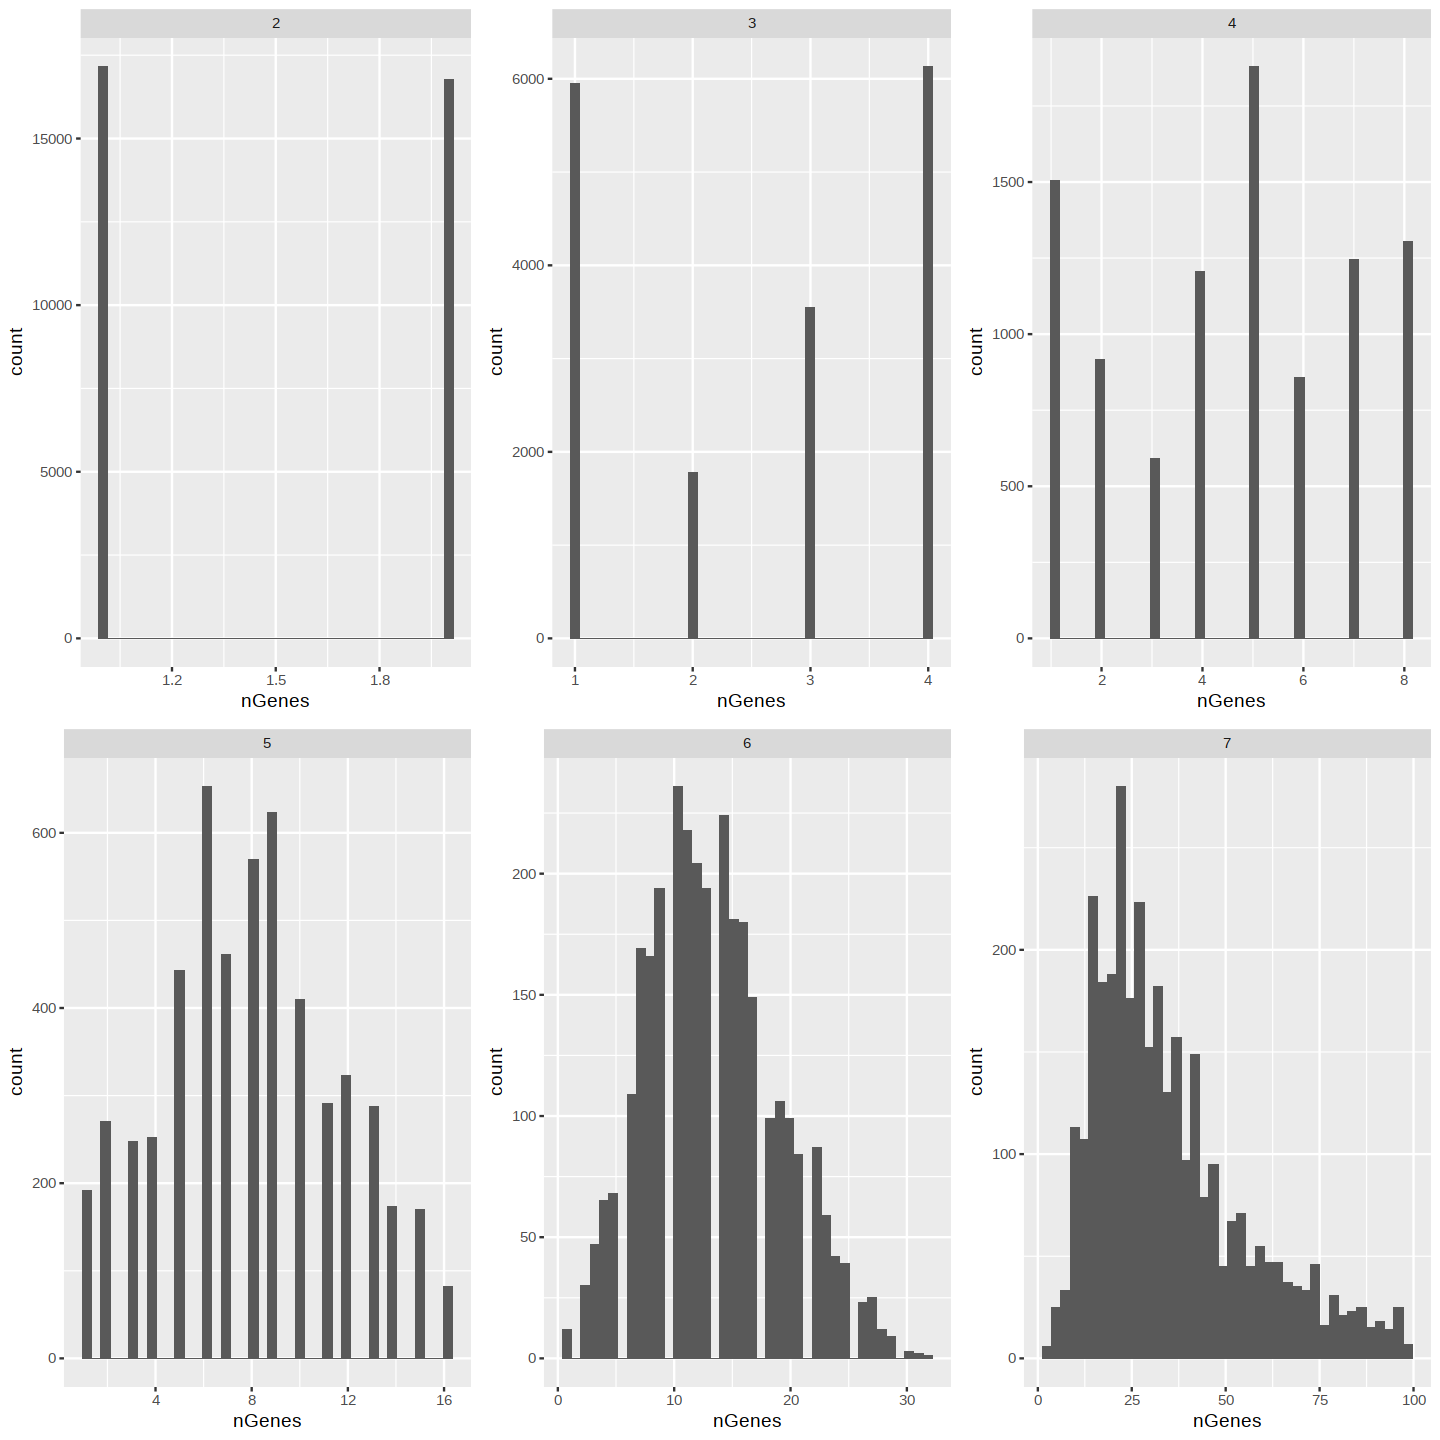

In [45]:
#### Anti-Correlation
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "Anti-Correlation" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "Anti-Correlation" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)
table(sapply(genesCor, length))

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0



    1     2     3     4     5     6     7     8     9    10    11    12    13 
86982  6903  1128   240   111    49    14     8     3     4     6     1     3 
   15    17    19    20    21    22    23    26    58 22835 
    1     2     1     1     1     1     1     1     1     1 

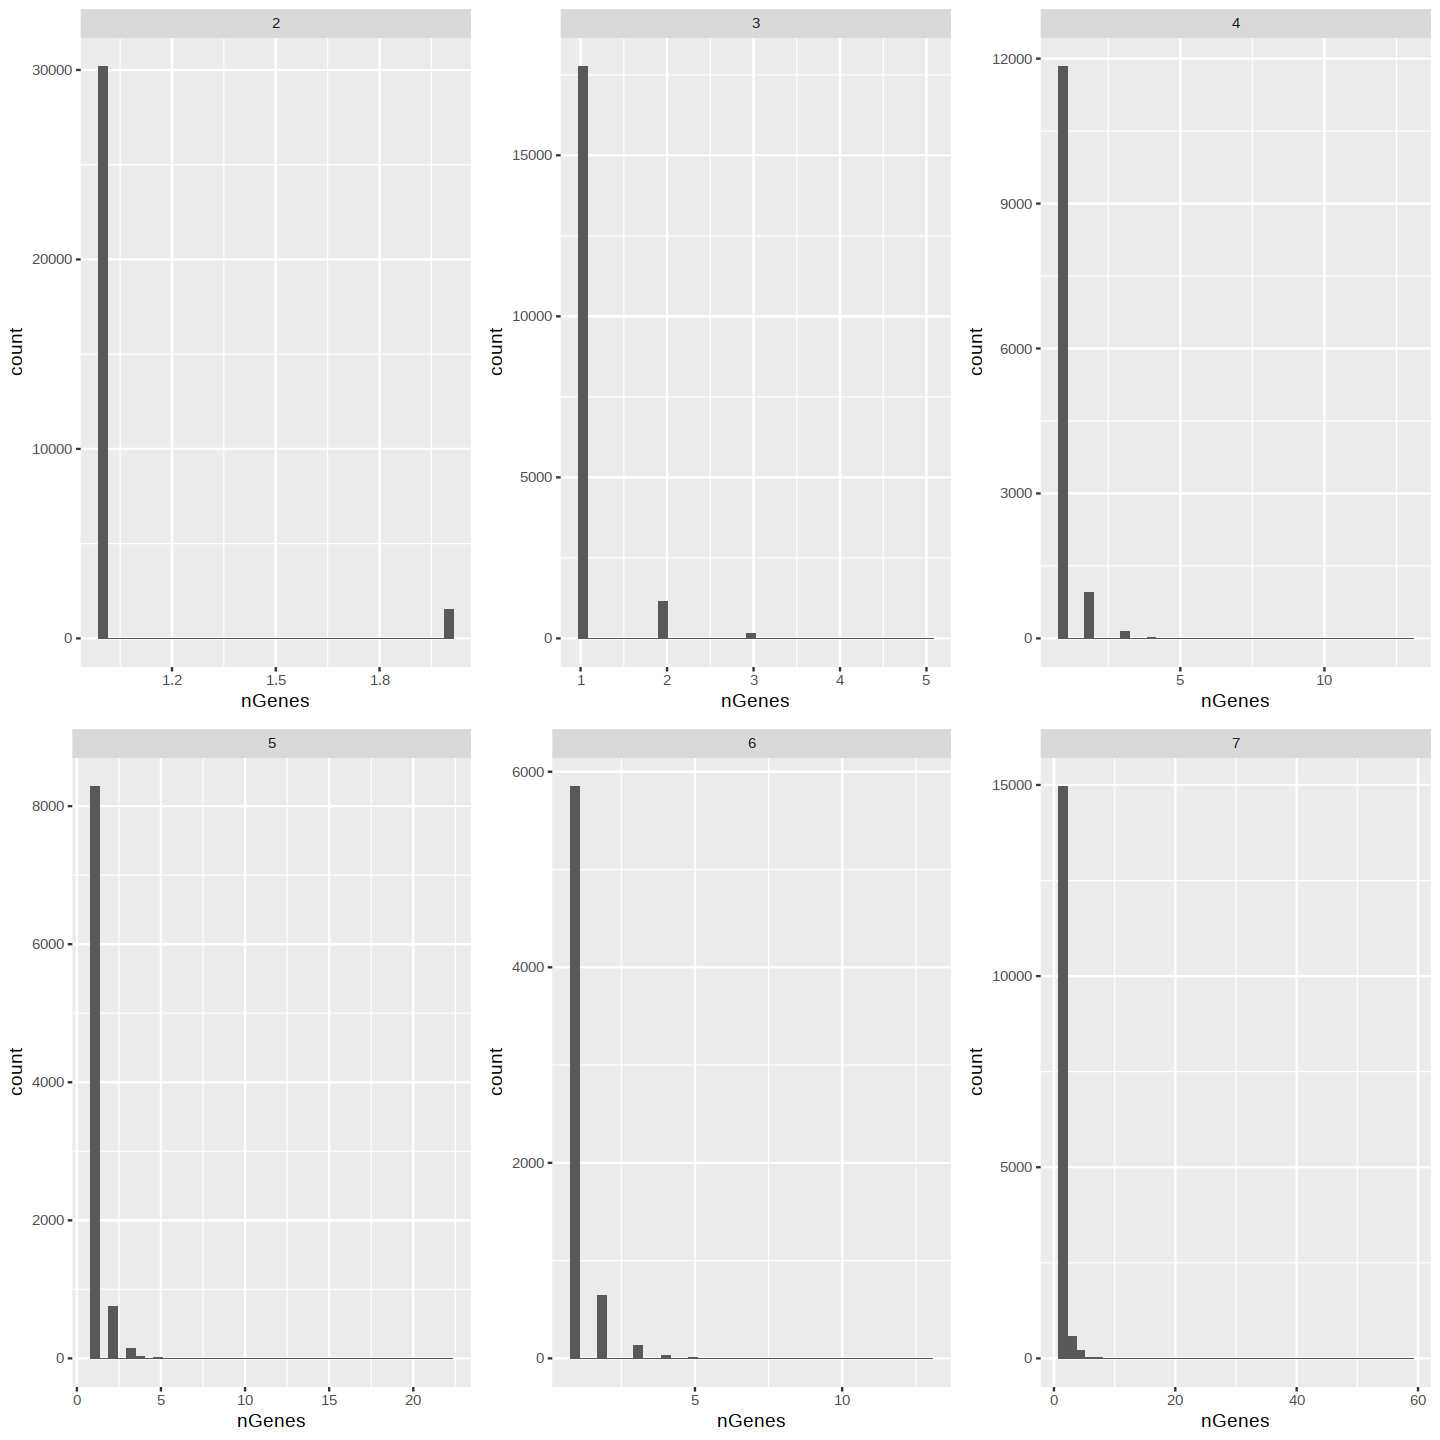

In [46]:
#### Consensus
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "Consensus" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "Consensus" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)
table(sapply(genesCons,length))

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0



     1      2      3      4      5      6      7      8      9     10     11 
100593  11874   2631    615    242    114     48     34     20     15     10 
    12     13     14     15     16     17     18     19     20     21     22 
     2      8     10      6      7      9      9      4      5      2      3 
    23     24     25     30     32     33     69  22835 
     3      2      1      1      2      1      1      1 

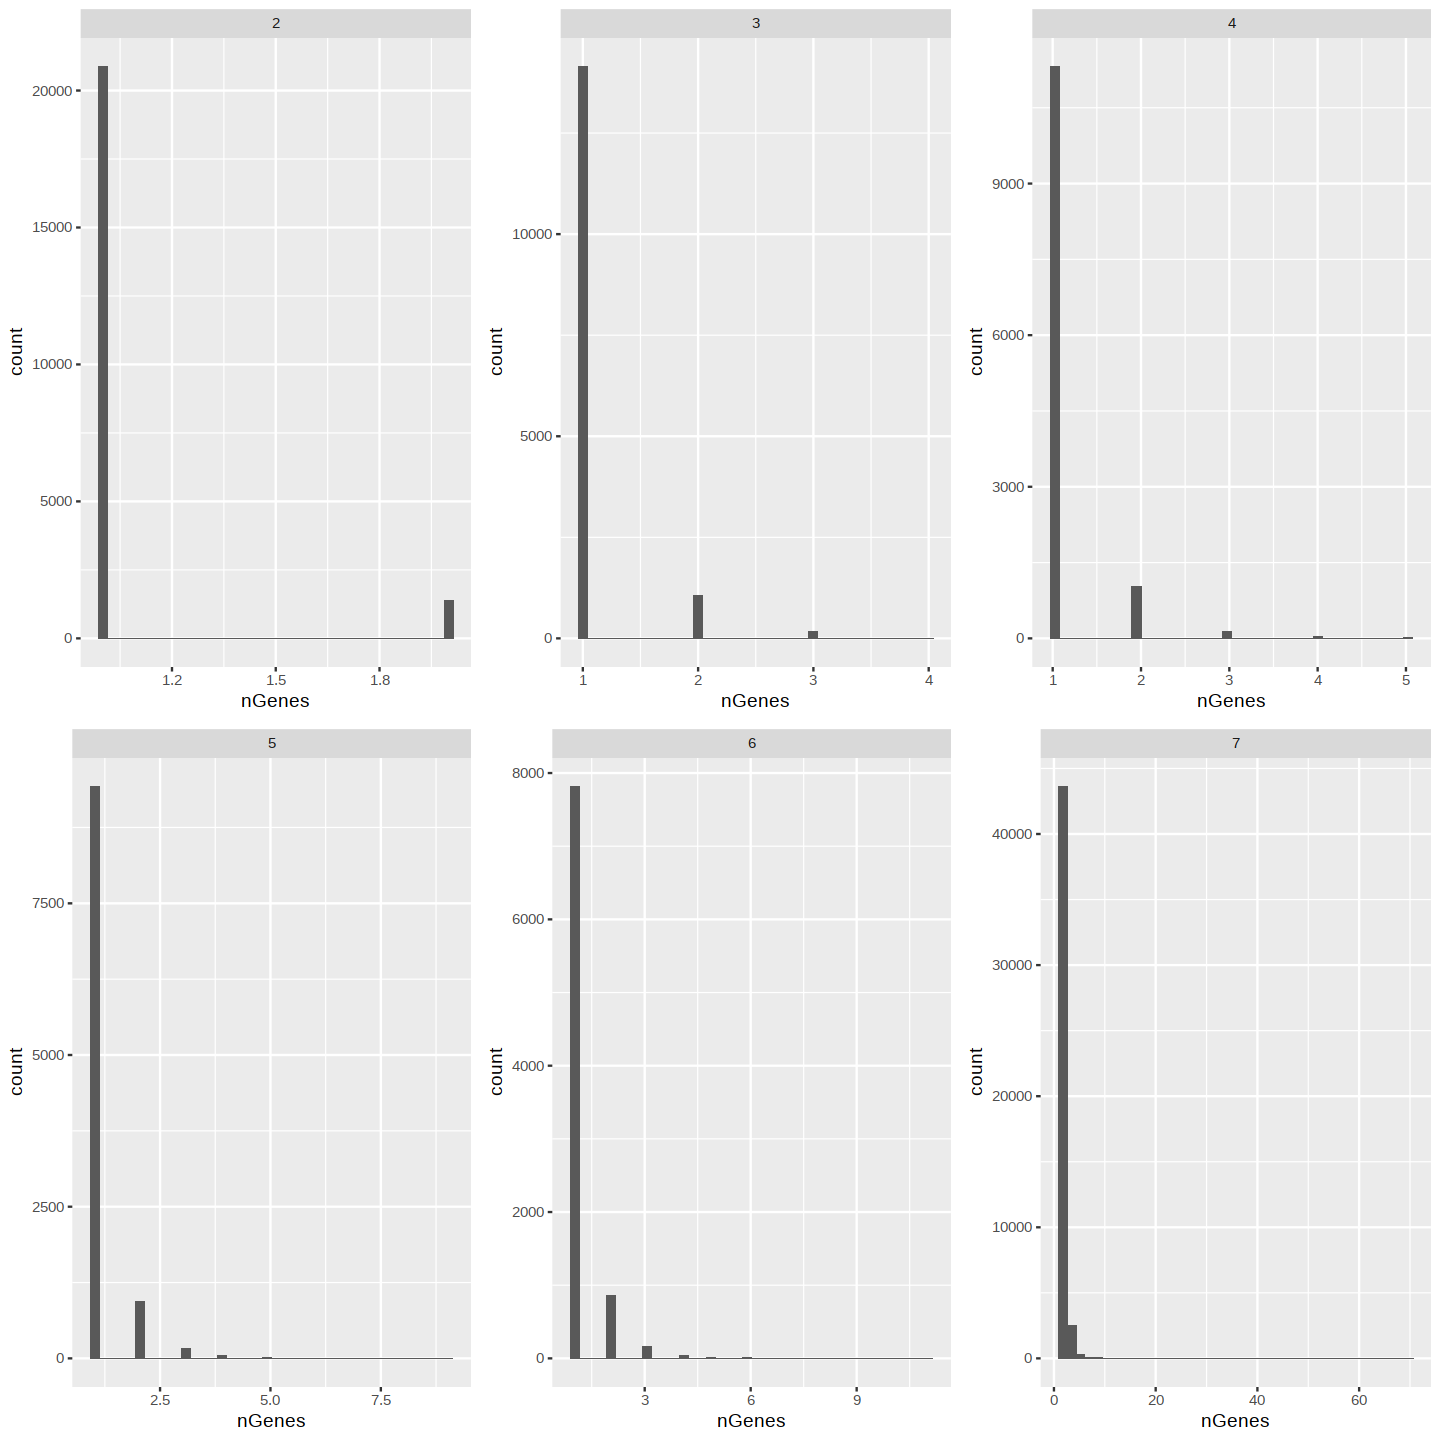

In [48]:
#### Consensus 0
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "Consensus0" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "Consensus0" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)
table(sapply(genesCons0,length))

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0



    1     2     3     4     5     6     7     8     9    10    11    12    13 
99756 13967  3889  1095   406   267   124    74    59    34    24    26    24 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
   32    18    11    16    13     9    19    22    17    21     1     7     7 
   27    28    29    30    31    44    45    46    47    48 22835 
    4    19     4    12    28     9     2     1     7     5     1 

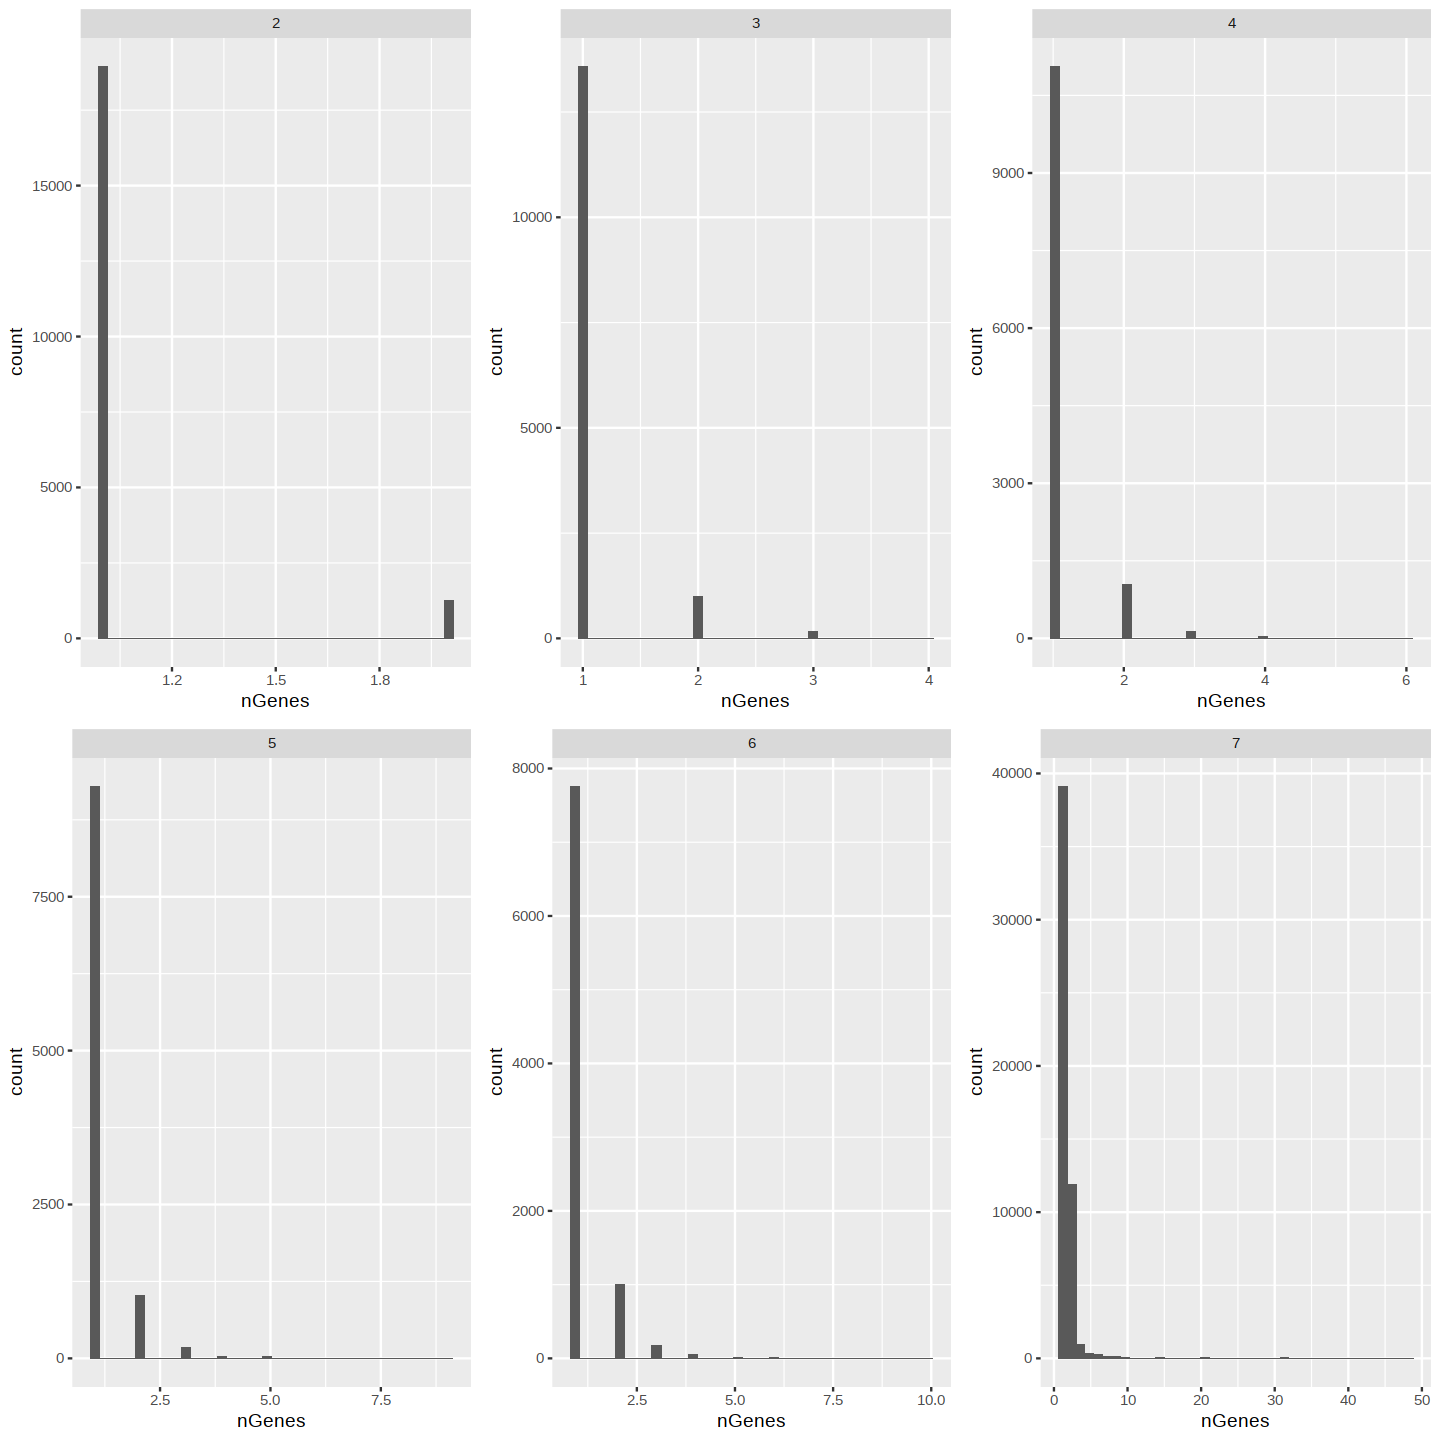

In [49]:
#### MeanInf0
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "MeanInf0" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "MeanInf0" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)
table(sapply(genesMeanInf0,length))

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0



    1     2     3     4     5     6     8    10 22835 
16485   650    61     7     4     1     1     1     1 

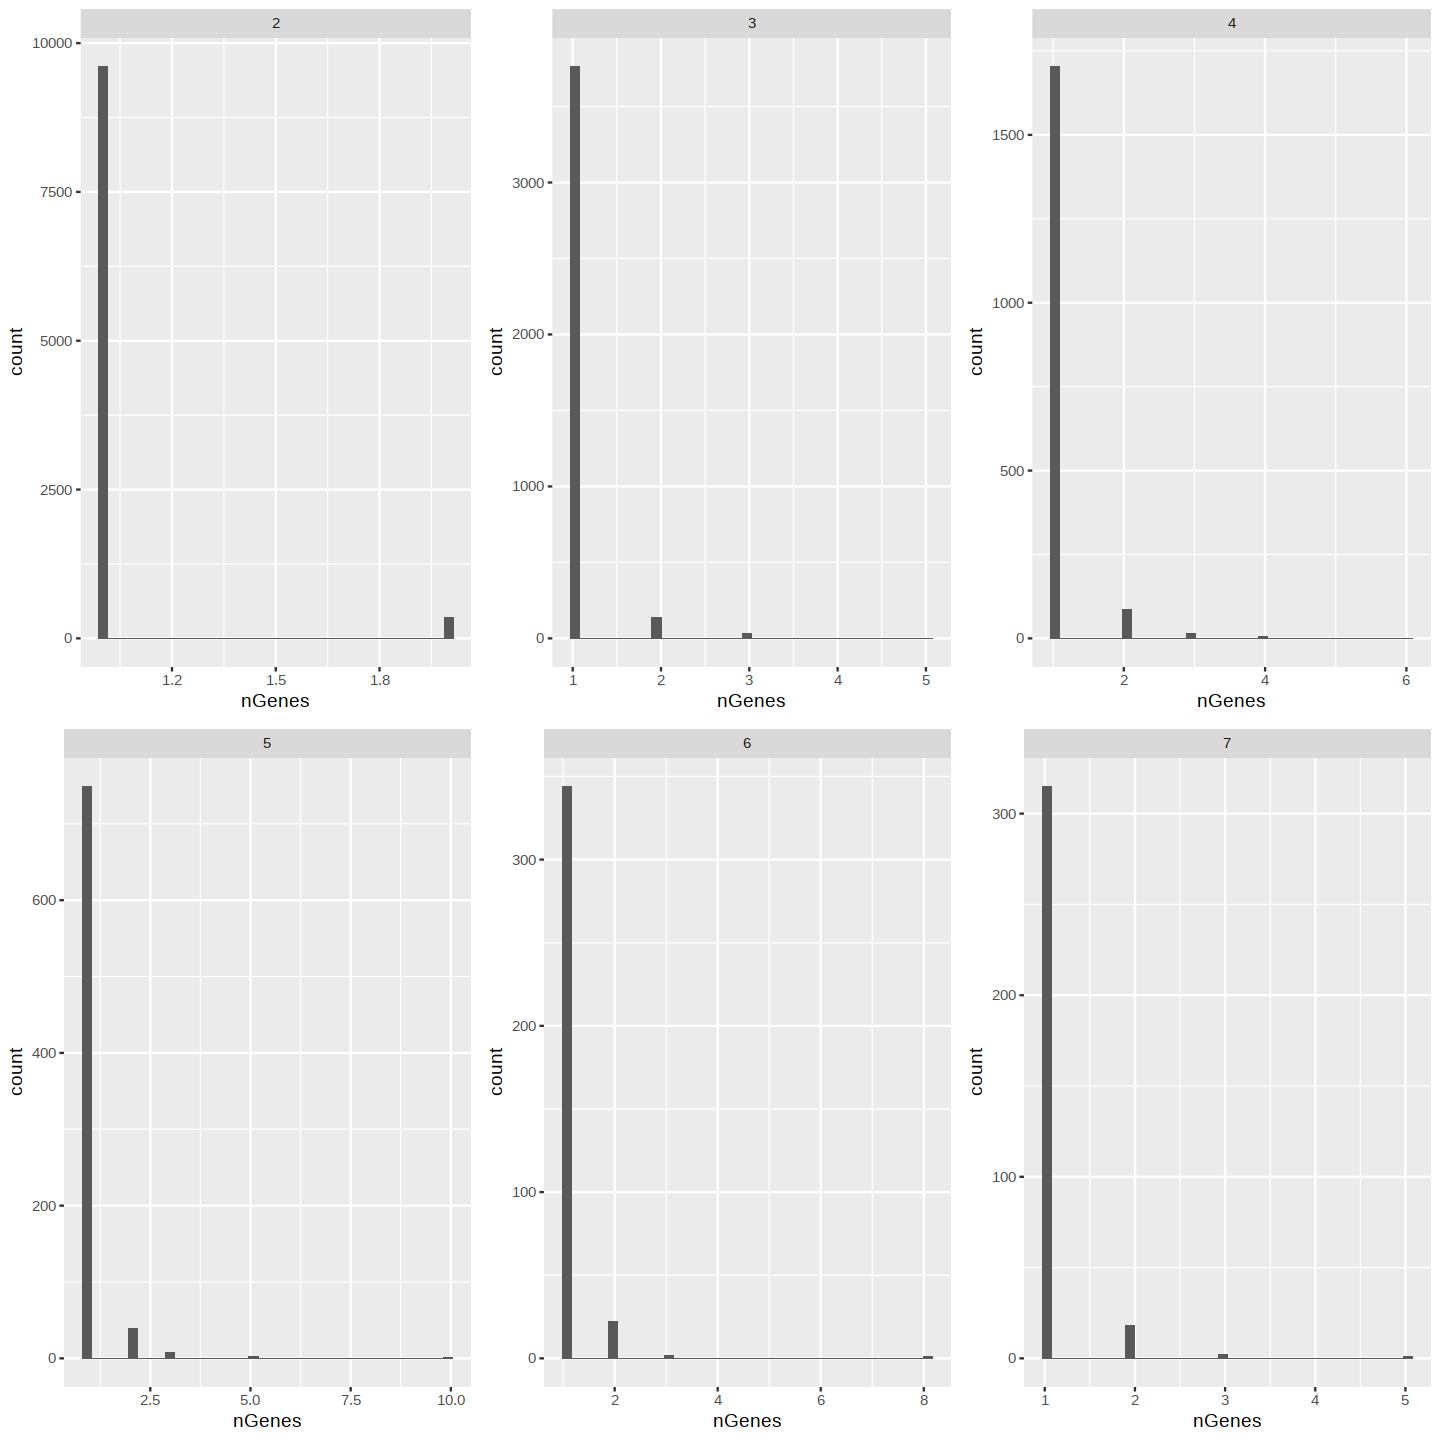

In [50]:
#### Thr
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "Cons_Thr" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "Cons_Thr" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)
table(sapply(genesThr,length))